<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/decision_tree/classify_bitcoin_and_litecoin_network_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier

# **Funciones**
---

In [ ]:
sns.set(style="darkgrid")


from matplotlib.colors import ListedColormap

def generate_colors(paleta="Set1", n_colors=15):
  """Generador de colores"""
  cmap = sns.color_palette(paleta, n_colors).as_hex()
  list_camap = ListedColormap(cmap)
  return cmap, list_camap

def plot_bar(data, paleta = None, figsize_x=8,figsize_y=5,fontsize=15, **kwards)->None:
  """Grafica un diagrama de barras con multiples caracteristicas"""
  paleta = paleta if paleta !=None else generate_colors()[0]
  v = kwards
  ejeX = v['ejeX']


  fig, ax = plt.subplots(figsize = (figsize_x, figsize_y))
  fig.suptitle(f'Diagrama de barras {v["title"]}', fontsize=fontsize)

  if type(v['ejeX']) == str:
    sns.countplot(x=ejeX, data=data, ax = ax, palette=paleta)
  else:
    ejeX = v['ejeX'][0]
    sns.countplot(x=ejeX,hue=v['ejeX'][1], data=data, ax = ax, palette=paleta)
    

  ax.set_ylabel(v['ejey'], size = 12)
  ax.set_xlabel(ejeX, size=fontsize-3)
  ax.set_xticklabels(ax.get_xticklabels(),fontsize = fontsize-3)
  for p in ax.patches:
    try:
      height = int(p.get_height())
      ax.text(p.get_x()+p.get_width()/2., height + 1,height, ha="center") 
    except:
      pass
paleta = {
    'Yangon': 'blue',
    'Mandalay': 'red',
    'Naypyitaw': 'orange'
}

# **Diccionario de datos**
---
- `Name`: nombre de la ventana de tiempo.
- `Netflows`: cantidad de netflows en la ventana de tiempo.
- `First_Protocol`: top 1 de protocolos usados en la ventana de tiempo.
- `Second_Protocol`: top 2 de protocolos usados en la ventana de tiempo.
- `Third_Protocol`: top 3 de protocolos usados en la ventana de tiempo.
- `p1_d`: 25% de los percentiles de todas las duraciones en la ventana de tiempo
- `p2_d`: 50% de los percentiles de todas las duraciones en la ventana de tiempo
- `p3_d`: 75% de los percentiles de todas las duraciones en la ventana de tiempo
- `duration`: duración total de la ventana de tiempo
- `max_d`: valor máximo de todas las duraciones en la ventana de tiempo.
- `min_d`: valor mínimo de todas las duraciones en la ventana de tiempo.
- `#packets`: número total de paquetes en la ventana de tiempo.
- `Avg_bps`: promedio de bits por segundo en la ventana de tiempo.
- `Avg_pps`: promedio de paquetes por segundo en la ventana de tiempo.
- `Avg_bpp`: promedio de bytes por paquete en la ventana de tiempo.
- `#Bytes`: número total de bytes en la ventana de tiempo.
- `#sp`: número total de puertos de origen usados en la ventana de tiempo.
- `#dp`: número total de puertos de destino usados en la ventana de tiempo.
- `first_sp`: top 1 de los puertos de origen en la ventana de tiempo.
- `second_sp`: top 2 de los puertos de origen en la ventana de tiempo.
- `third_sp`: top 3 de los puertos de origen en la ventana de tiempo.
- `first_dp`: top 1 de los puertos de destino en la ventana de tiempo.
- `second_dp`: top 2 de los puertos de destino en la ventana de tiempo.
- `third_dp`: top 3 de los puertos de destino en la ventana de tiempo.
- `p1_ip`: 25% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p2_ip`: 50% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p3_ip`: 75% de los percentiles de todas las entradas de paquetes en la ventana de tiempo.
- `p1_ib`: 25% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p2_ib`: 50% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `p3_ib`: 75% de los percentiles de todas las entradas de bytes en la ventana de tiempo.
- `Type`: tipo de ventana de tiempo
  - `benignas`: 0
  - `bitcash`: 1
  - `bitcoin`: 2
  - `ethereum `: 3
  - `monero`: 4
  - `litecoin`: 5


# **Data**
---

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/datasets/main/cryptojacking.csv')

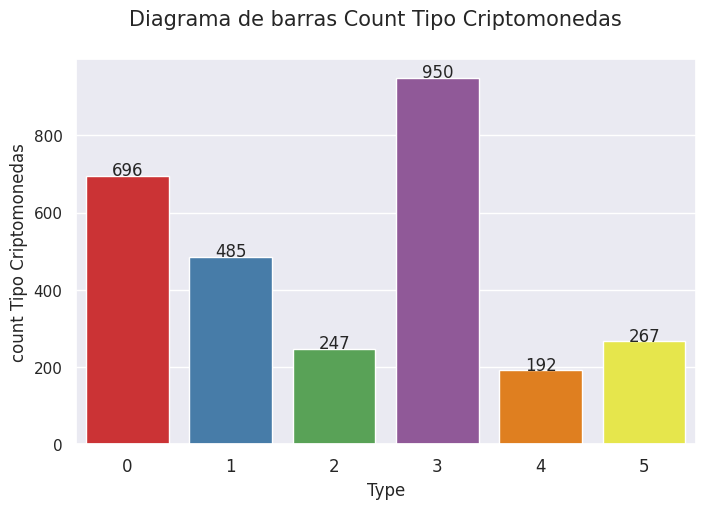

In [ ]:
plot_bar(data, paleta=None, ejeX='Type',ejey='count Tipo Criptomonedas',title='Count Tipo Criptomonedas')

# **Para el ejercicio, realizaremos una clasificación de trafico entre bitcoins y litecoin**

In [ ]:
data_sample = data[(data.Type == 2) | (data.Type == 5)].drop('Unnamed: 0', axis=1)

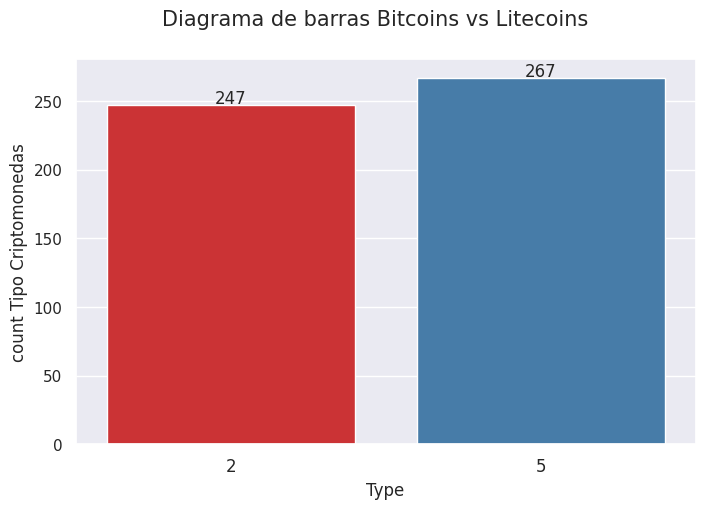

In [ ]:
plot_bar(data_sample, paleta=None, ejeX='Type',ejey='count Tipo Criptomonedas',title='Bitcoins vs Litecoins')

- El conjunto sufre un desbalance minimo

In [ ]:
data_sample.isna().sum()

Name                 0
Netflows             0
First_Protocol       0
Second_Protocol    514
Third_Protocol     514
p1_d                 0
p2_d                 0
p3_d                 0
duration             0
max_d                0
min_d                0
#packets             0
Avg_bps              0
Avg_pps              0
Avg_bpp              0
#Bytes               0
#sp                  0
#dp                  0
first_sp             0
second_sp            4
third_sp           409
first_dp             0
second_dp            4
third_dp           410
p1_ip                0
p2_ip                0
p3_ip                0
p1_ib                0
p2_ib                0
p3_ib                0
Type                 0
dtype: int64

Por cuestiones del ejercicio se eliminaran las columnas de valores nulos

In [ ]:
data_sample = data_sample.drop(['third_sp', 'third_dp'], axis=1)

# Data Split
---

Si bien se puede usar las variables categoricas, por fines del ejercicio se usaran las variables cuantitativas.

In [ ]:
X = data_sample.select_dtypes(['int64', 'float64'])

In [ ]:
X = X.dropna()
X.isna().sum()

Netflows     0
p1_d         0
p2_d         0
p3_d         0
duration     0
max_d        0
min_d        0
#packets     0
Avg_bps      0
Avg_pps      0
Avg_bpp      0
#Bytes       0
#sp          0
#dp          0
first_sp     0
second_sp    0
first_dp     0
second_dp    0
p1_ip        0
p2_ip        0
p3_ip        0
p1_ib        0
p2_ib        0
p3_ib        0
Type         0
dtype: int64

In [ ]:
y = X['Type']
X = X.iloc[:, :-1]


**Select the best features**


Se cambiara solo el criterio de impureza, en proximos ejercicios se implementaran otros hiperparametros. Se usa un ensamblador para encontrar las mejores caracteristicas.

In [ ]:
model_best_feature_gini =  ExtraTreesClassifier(n_estimators=100, criterion='gini')

In [ ]:
data_best_gini = model_best_feature_gini.fit(X, y)

Seleccionamos las mejores caracteristicas, para implementar un metodo para la reducción de overfitting.

In [ ]:
model = SelectFromModel(data_best_gini, prefit=True)
best_features = X[X.columns[model.get_support(indices = True)]].columns
best_features

Index(['p1_d', 'p2_d', 'p3_d', 'max_d', 'min_d', 'first_sp', 'second_sp',
       'first_dp', 'p2_ip', 'p1_ib'],
      dtype='object')

No se implementará un proceso de estandarización, ya que el modelo es robusto ante ese tipo de casos.

In [ ]:
X =  X[best_features]
X

,p1_d,p2_d,p3_d,max_d,min_d,first_sp,second_sp,first_dp,p2_ip,p1_ib
1181,114.79300,180.0435,245.27525,245.276,114.736,3332,51931.0,3332,12.5,433.00
1182,196.18225,196.1895,196.19675,196.204,196.175,3332,51905.0,3332,11.0,2679.50
1183,244.14325,244.1435,244.14375,244.144,244.143,3332,51911.0,3332,16.0,3642.75
1184,244.04600,244.0460,244.04600,244.046,244.046,3332,51908.0,3332,16.0,3592.50
1185,246.79500,246.7950,246.79500,246.795,246.795,51915,3332.0,51915,18.5,3728.75
...,...,...,...,...,...,...,...,...,...,...
2832,2.15850,4.3170,6.47550,8.634,0.000,3333,52003.0,3333,1.5,328.25
2833,583.36850,583.8100,584.25150,584.693,582.927,3333,52003.0,3333,55.0,10108.75
2834,288.55375,288.5545,288.55525,288.556,288.553,3333,52003.0,3333,22.5,3865.00
2835,285.37900,285.3790,285.37900,285.379,285.379,3333,52003.0,3333,25.5,4627.50


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=12354, shuffle=True, stratify=y)

In [ ]:
final_comp = 0
for comp in range(3, X_train.shape[1]):
  pca = PCA(n_components=comp, random_state=42)
  pca.fit(X_train)
  comp_check = pca.explained_variance_ratio_
  final_comp = comp
  if comp_check.sum() > 0.85:
    break

  

final_pca = PCA(n_components=final_comp, random_state=42)
final_pca.fit(X_train)
data_x_train =final_pca.transform(X_train)
data_x_test = final_pca.transform(X_test)
num_comps = comp_check.shape[0]

print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 3 components, we can explain 0.9958502469567533% of the variability in the original data.


In [ ]:
DecisionTreeClassifier()